 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_path=Path('Resources/whale_returns.csv')
whale_returns=pd.read_csv(whale_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_returns=whale_returns.sort_index()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns.dropna(inplace=True)

In [6]:
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algo_path=Path('Resources/algo_returns.csv')
algo_returns=pd.read_csv(algo_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_returns=algo_returns.sort_index()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_returns.dropna(inplace=True)

In [10]:
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P 500 Closing Prices
sp500_path=Path('Resources/sp500_history.csv')
sp500_history=pd.read_csv(sp500_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_history=sp500_history.sort_index()
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [12]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [13]:
# Fix Data Types
sp500_history['Close']=sp500_history['Close'].str.replace('$', '')
sp500_history['Close']=sp500_history['Close'].astype(float)
sp500_history.dtypes

<ipython-input-13-6ab6a09924e8>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_history['Close']=sp500_history['Close'].str.replace('$', '')


Close    float64
dtype: object

In [14]:
# Calculate Daily Returns
sp500_daily_returns=sp500_history.pct_change()

In [15]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns.isnull().sum()

Close    0
dtype: int64

In [16]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.rename(columns={'Close':'sp500_returns'}, inplace=True)
sp500_daily_returns.head()

,sp500_returns
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df=pd.concat([whale_returns, algo_returns, sp500_daily_returns], axis='columns', join='inner')
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500_returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

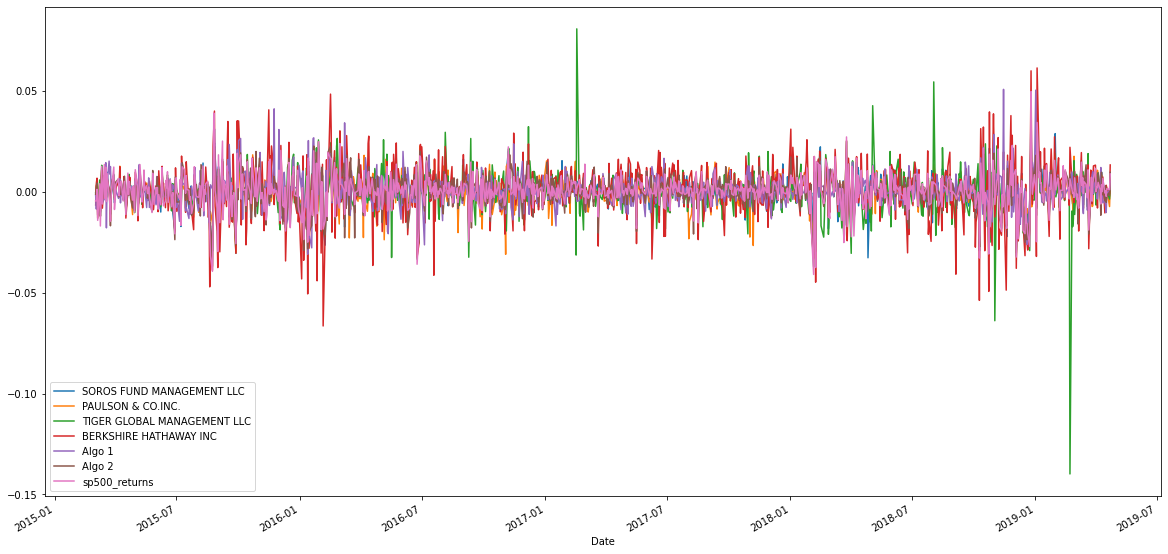

In [18]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=[20,10])

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

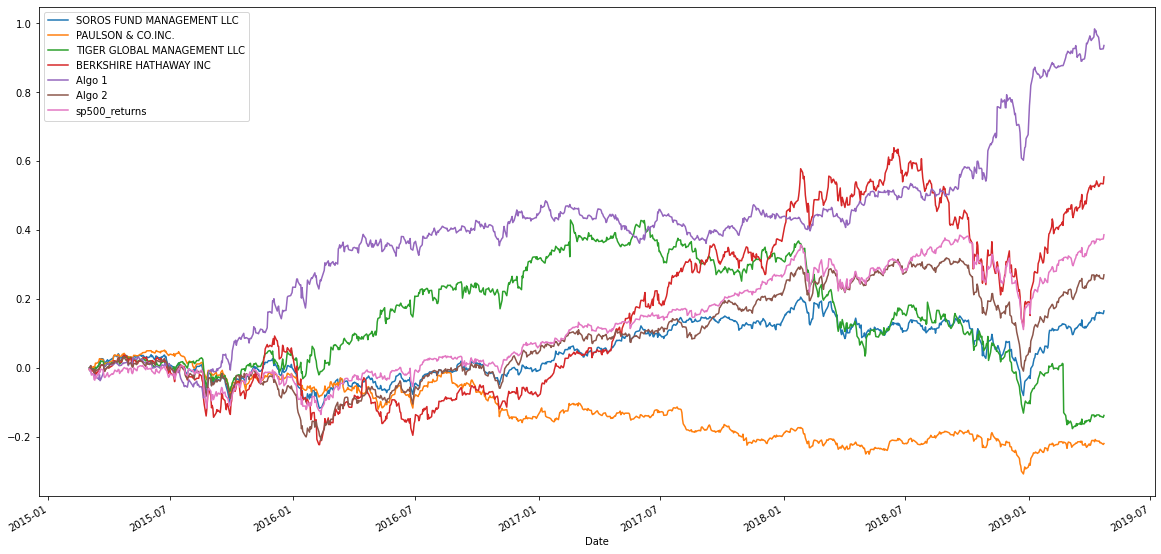

In [19]:
# Calculate cumulative returns of all portfolios
combined_cumulative_returns=(1+combined_df).cumprod()-1
# Plot cumulative returns
combined_cumulative_returns.plot(figsize=[20,10])

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

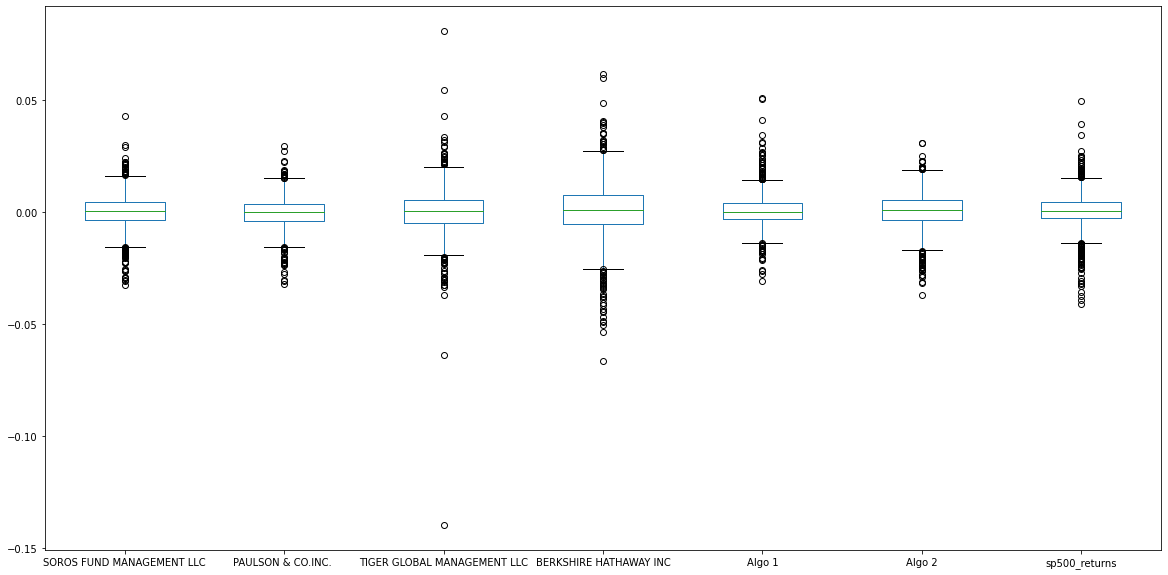

In [20]:
# Box plot to visually show risk
combined_df.plot.box(figsize=[20,10])

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
combined_daily_std=combined_df.std().sort_values()
combined_daily_std

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
sp500_returns                  0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [22]:
# Calculate  the daily standard deviation of S&P 500
sp500_daily_std=sp500_daily_returns.std()

# Determine which portfolios are riskier than the S&P 500
risky_portfolios=combined_daily_std[combined_daily_std>combined_daily_std['sp500_returns']]
risky_portfolios 

TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std=combined_daily_std*np.sqrt(252)
annualized_std

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
sp500_returns                  0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

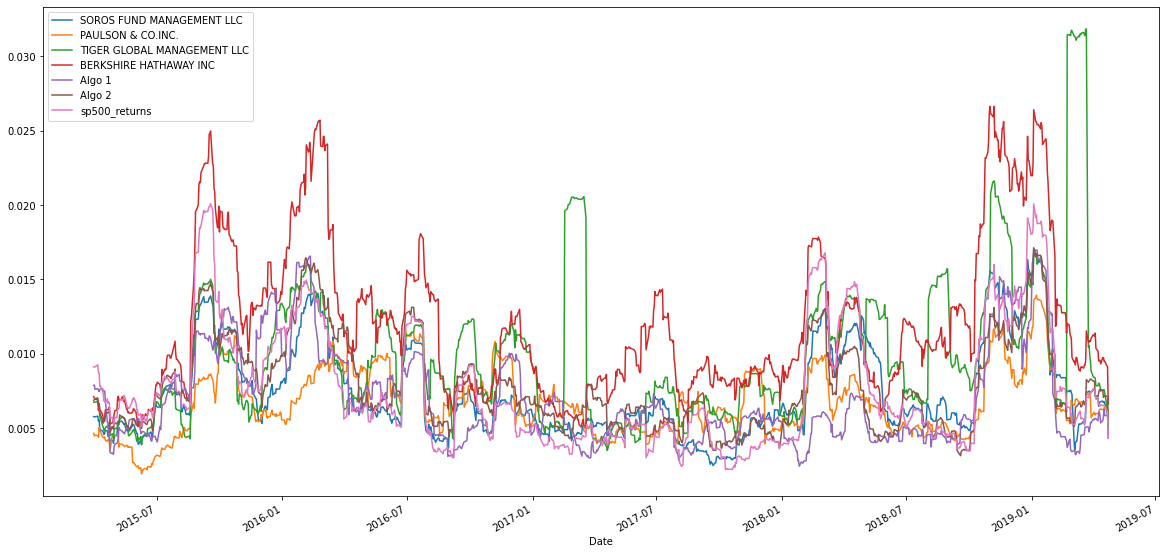

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_21_day_rolling_std=combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
combined_21_day_rolling_std.plot(figsize=[20,10])

### Calculate and plot the correlation

In [25]:
# Calculate the correlation
combined_corr=combined_df.corr()
# Display de correlation matrix
combined_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500_returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
sp500_returns,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:>

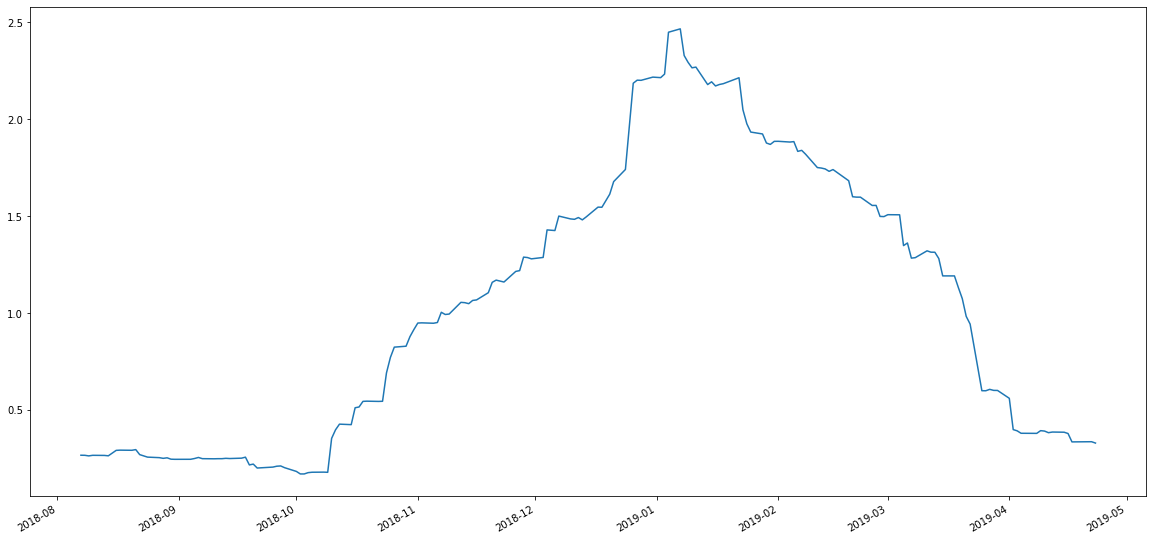

In [71]:
# Calculate covariance of a single portfolio
soros_cov=combined_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combined_df['sp500_returns'])
# Calculate variance of S&P 500
sp500_var=combined_df['sp500_returns'].var()
# Computing beta
soros_beta=soros_cov/sp500_var
# Plot beta trend
soros_beta.plot(figsize=[20,10])

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:>

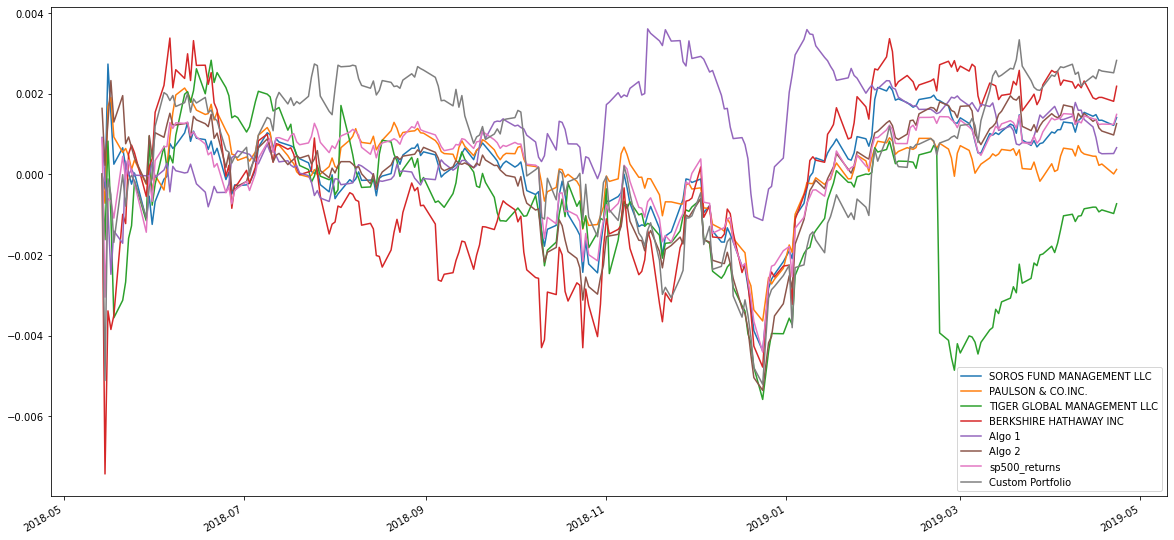

In [58]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21).mean().plot(figsize=[20,10])

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [28]:
# Annualized Sharpe Ratios
sharpe_ratios=(combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
sp500_returns                  0.648267
dtype: float64

In [29]:
combined_df.shape

(1043, 7)

<AxesSubplot:title={'center':'Sharpe Ratios'}>

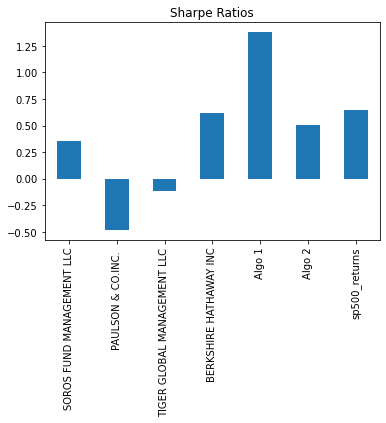

In [30]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Based on my analysis, I have concluded that although both algorithmic strategies were effective, Algo 1 is the clear winner. While Algo 2 failed to outperform the sp500, it was successfull in outperforming 3 out of the 4 whale portfolios. Alternatively, Algo 1 has massively outperformed all whale portfolios as well as the sp500. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [31]:
# Reading data from 1st stock
goog_path=Path('Resources/goog_historical.csv')
goog_historical=pd.read_csv(goog_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True).sort_index()

In [32]:
# Reading data from 2nd stock
aapl_path=Path('Resources/aapl_historical.csv')
aapl_historical=pd.read_csv(aapl_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True).sort_index()

In [33]:
# Reading data from 3rd stock
cost_path=Path('Resources/cost_historical.csv')
cost_historical=pd.read_csv(cost_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True).sort_index()
cost_historical.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [34]:
# Combine all stocks in a single DataFrame
custom_portfolio=pd.concat([goog_historical, aapl_historical, cost_historical], axis='columns', join='inner')
custom_portfolio

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-11,GOOG,1098.26,AAPL,188.59,COST,195.76
2018-05-14,GOOG,1100.20,AAPL,188.15,COST,195.88
2018-05-15,GOOG,1079.23,AAPL,186.44,COST,195.48
2018-05-16,GOOG,1081.77,AAPL,188.18,COST,198.71
2018-05-17,GOOG,1078.59,AAPL,186.99,COST,199.60
...,...,...,...,...,...,...
2019-05-03,GOOG,1185.40,AAPL,211.75,COST,244.62
2019-05-06,GOOG,1189.39,AAPL,208.48,COST,244.23
2019-05-07,GOOG,1174.10,AAPL,202.86,COST,240.18


In [36]:
# Reorganize portfolio data by having a column per symbol
columns=['symbol', 'GOOG','symbol', 'AAPL','symbol', 'COST']
custom_portfolio.columns=columns

In [37]:
custom_portfolio=custom_portfolio.drop(columns='symbol')
custom_portfolio.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [38]:
# Calculate daily returns
custom_daily_returns=custom_portfolio.pct_change()

# Drop NAs
custom_daily_returns.dropna(inplace=True)

# Display sample data
custom_daily_returns.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [39]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
custom_portfolio_returns=custom_daily_returns.dot(weights)
# Display sample data
custom_portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [40]:
# Join your returns DataFrame to the original returns DataFrame
combined_df=pd.concat([combined_df, custom_portfolio_returns], axis='columns', join='inner')
combined_df=combined_df.rename(columns={0:'Custom Portfolio'})

In [41]:
custom_portfolio_returns.shape

(249,)

In [42]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
sp500_returns                  0
Custom Portfolio               0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [43]:
# Calculate the annualized `std`
combined_df.std()*np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
sp500_returns                  0.152054
Custom Portfolio               0.211496
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

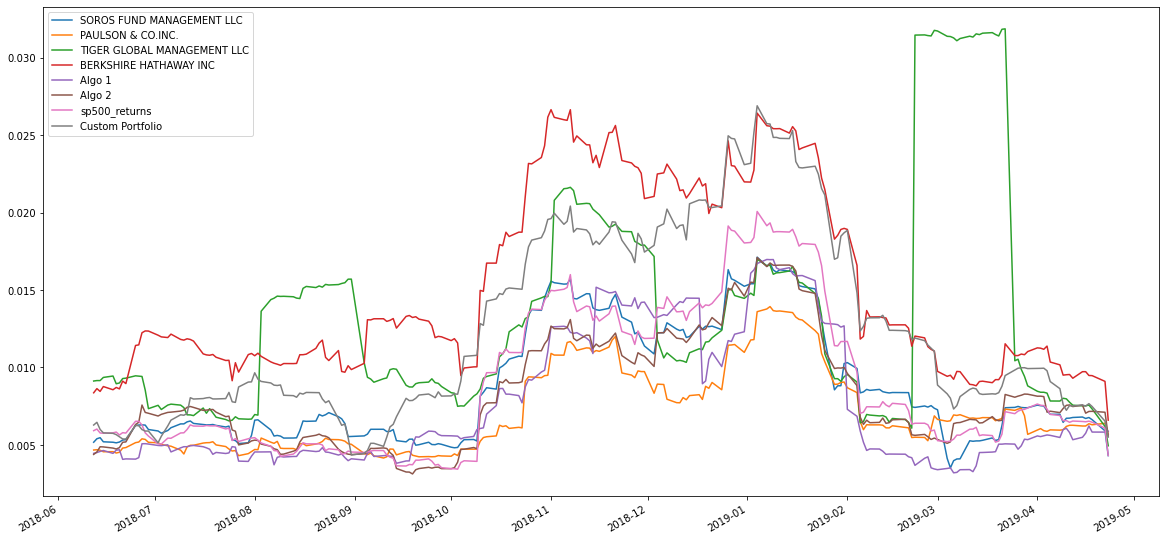

In [44]:
# Calculate rolling standard deviation
rolling_std=combined_df.rolling(window=21).std()
# Plot rolling standard deviation
rolling_std.plot(figsize=[20,10])

### Calculate and plot the correlation

<AxesSubplot:>

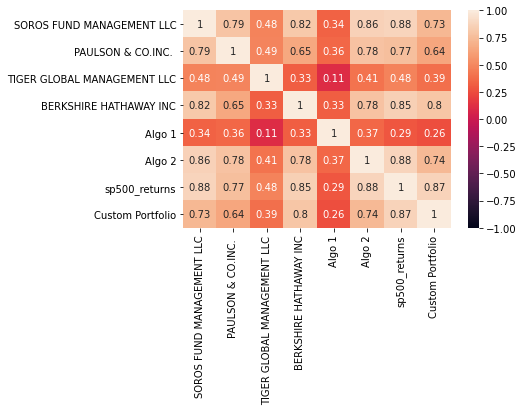

In [45]:
# Calculate and plot the correlation
import seaborn as sns
sns.heatmap(combined_df.corr(),vmin=-1,vmax=1,annot=True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [68]:
# Calculate and plot Beta
custom_cov=combined_df['Custom Portfolio'].rolling(window=60).cov(combined_df['sp500_returns'])
custom_beta=custom_cov/sp500_var

<AxesSubplot:>

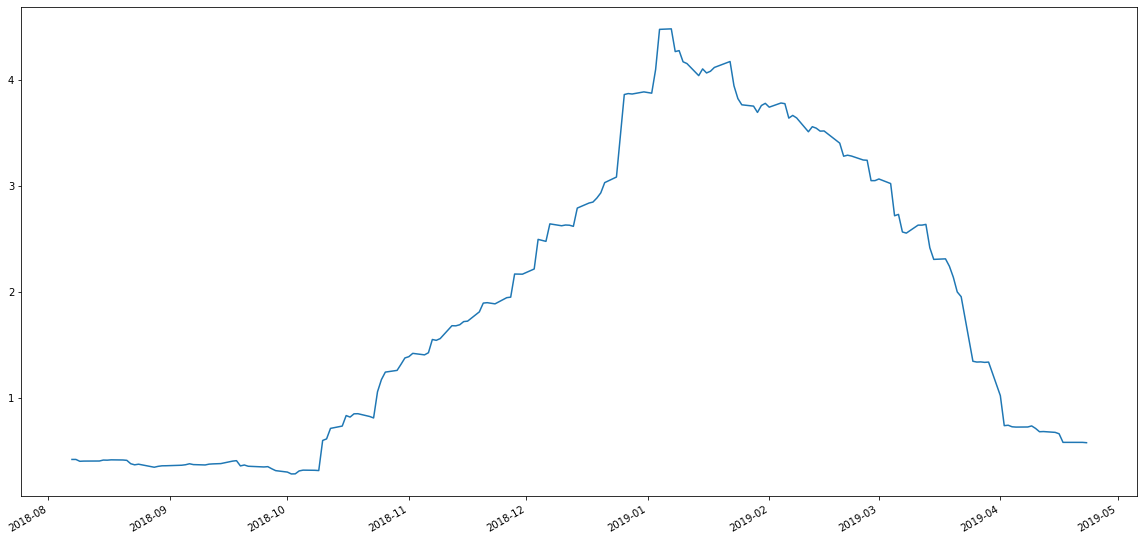

In [70]:
custom_beta.plot(figsize=[20,10])

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [55]:
# Calculate Annualzied Sharpe Ratios
custom_sharpe_ratios=(combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
print(custom_sharpe_ratios.sort_values())
print(sharpe_ratios.sort_values())

TIGER GLOBAL MANAGEMENT LLC   -1.034216
Algo 2                         0.080607
BERKSHIRE HATHAWAY INC         0.159756
PAULSON & CO.INC.              0.258738
SOROS FUND MANAGEMENT LLC      0.430713
sp500_returns                  0.584820
Custom Portfolio               0.933123
Algo 1                         2.035665
dtype: float64
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
SOROS FUND MANAGEMENT LLC      0.356417
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
sp500_returns                  0.648267
Algo 1                         1.378648
dtype: float64


In [49]:
combined_df.head()
combined_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500_returns,Custom Portfolio
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.011959


<AxesSubplot:>

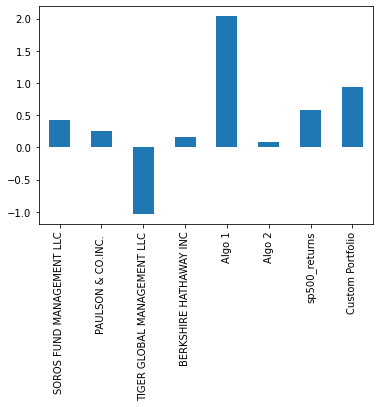

In [56]:
# Visualize the sharpe ratios as a bar plot
custom_sharpe_ratios.plot(kind='bar')


In [51]:
combined_df.shape

(237, 8)

### How does your portfolio do?

Write your answer here!


   When compared with the other portfolios, my portfolio came in second place losing only to Algo 1. I would also like to point 
   out that the time window for the data in my portfolio is significantly shorter than that of the other portfolios. Because of 
   this, when my portfolio was added to the dataframe, the entire dataframe was cut to the length of my portfolio. As a result,
   the information obtained at the end of this assignment differs from what we saw before the custom portfolio was added. Either 
   way, our custom portfolio, as well as Algo 1, are still the best performing portfolios out of the bunch. I am only mentioning
   all this because I have noticed that some of the other portfolios did better than others over a longer time period while others 
   had better results over a shorter time period.